<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, matplotlib as mpl
import seaborn as sns
import pcmdpy as ppy
from corner import corner
%matplotlib inline

GPU acceleration not available, sorry
No module named 'pycuda'


In [2]:
results = {}
truths = {}

In [3]:
truths['tau'] = ppy.galaxy.CustomGalaxy(ppy.metalmodels.FixedWidthNormMDF(0.3), ppy.dustmodels.FixedWidthLogNormDust(0.3),
                                       ppy.sfhmodels.TauModel(iso_step=-1), ppy.distancemodels.VariableDistance(),
                                       initial_params=[-.2, -.5, 3.25, 3.1, 29.2])
results['tau'] = ppy.plotting.ResultsPlotter('results/mock_tau_dmod.csv', true_model=truths['tau'], prior=None,
                                             run_name='Tau-Dmod')

(2000, 6184.5)

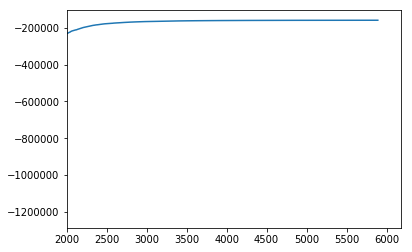

In [4]:
plt.plot(results['tau'].df.logl)
plt.xlim(xmin=2000)

In [5]:
r = results['tau']

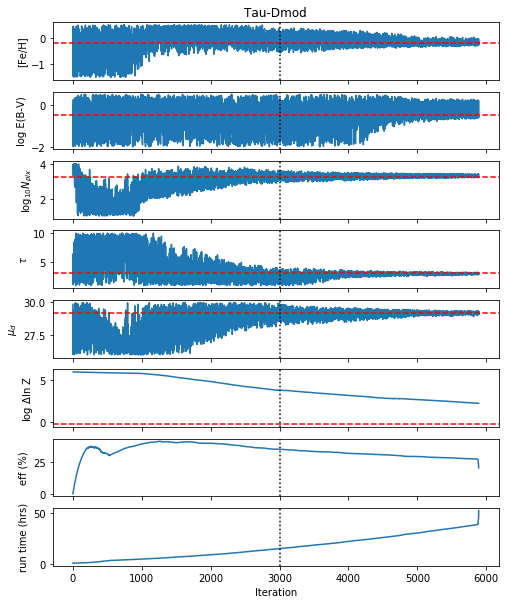

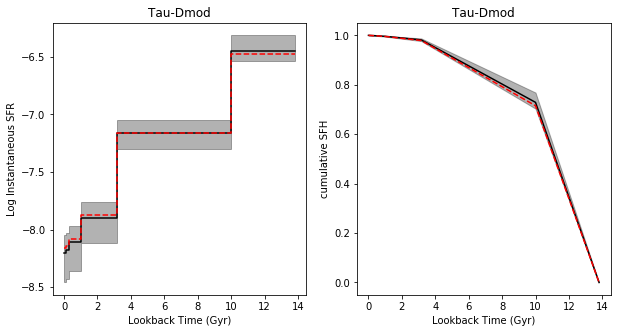

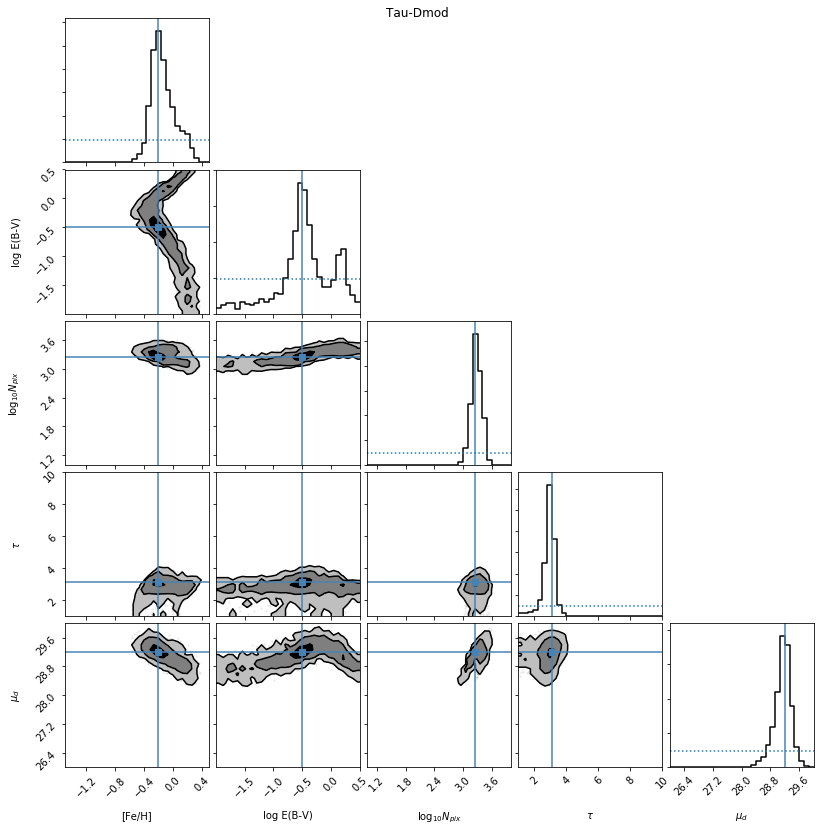

In [6]:
r.plot_everything(burn=3000);

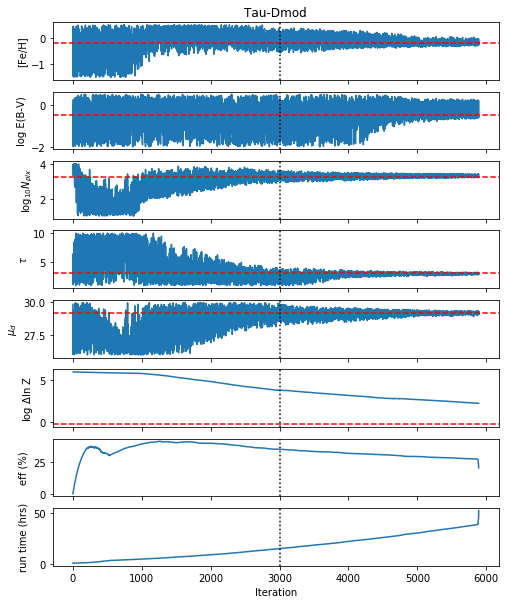

In [7]:
r = results['tau']
r.plot_chains(burn=3000);
plt.savefig('figures/dmod_chains.pdf')

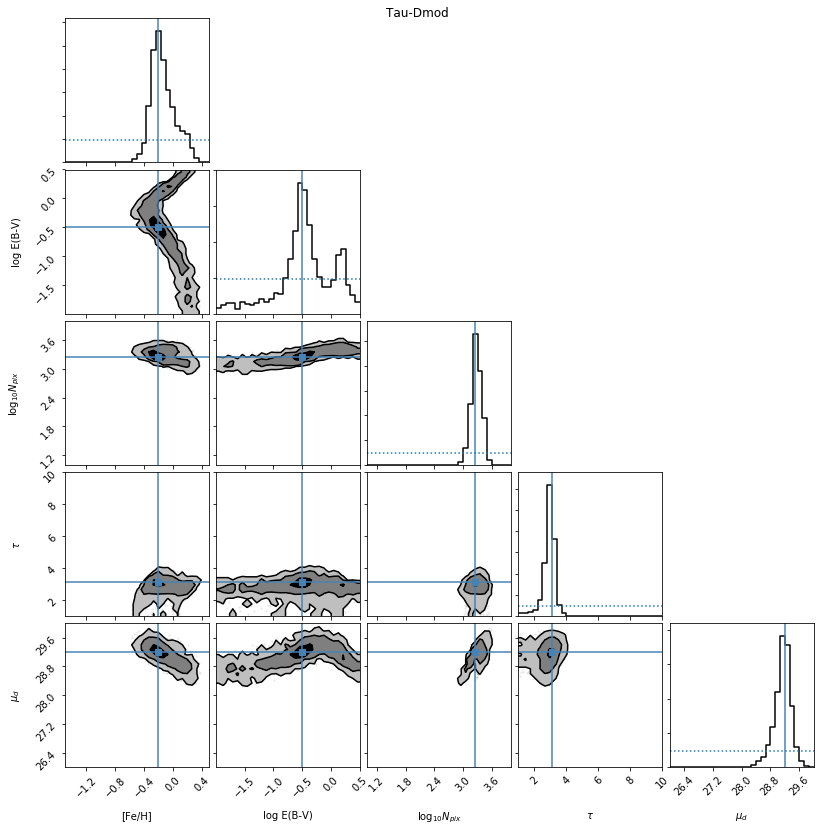

In [8]:
r.plot_corner(burn=3000, weight=False);
plt.savefig('figures/dmod_corner.pdf')

In [9]:
def dmod_to_Mpc(dmod):
    return 10.**(0.2 * (dmod - 25.))

In [10]:
x = r.df.dmod[4500:].values
y = dmod_to_Mpc(x)

In [11]:
print(np.mean(x), np.std(x))
print(np.mean(y), np.std(y))

29.178894320632637 0.12671532330264176
6.862998621713362 0.3972202058860961


In [12]:
dist_true = dmod_to_Mpc(29.2)
dist_true

6.918309709189363

In [13]:
amodel = ppy.sfhmodels.ConstantSFR([3.25], iso_step=-1)
params = np.append(np.append([-.2, -0.5], amodel.logSFH), 29.2)
truths['SFH6'] = ppy.galaxy.CustomGalaxy(ppy.metalmodels.FixedWidthNormMDF(0.3), ppy.dustmodels.FixedWidthLogNormDust(0.3),
                                        ppy.sfhmodels.NonParam(iso_step=-1), ppy.distancemodels.VariableDistance(),
                                           initial_params=params)
results['SFH6'] = ppy.plotting.ResultsPlotter('results/mock_SFH6.csv', true_model=truths['SFH6'], prior=None,
                                             run_name='6 SFH Bins')

In [14]:
new_edges = np.array([6., 8., 9., 9.5, 10., 10.2])
amodel.update_edges(new_edges)
params = np.append(np.append([-.2, -0.5], amodel.logSFH), 29.2)
truths['SFH5'] = ppy.galaxy.CustomGalaxy(ppy.metalmodels.FixedWidthNormMDF(0.3), ppy.dustmodels.FixedWidthLogNormDust(0.3),
                                        ppy.sfhmodels.NonParam(iso_step=-1).update_edges(new_edges), ppy.distancemodels.VariableDistance(),
                                           initial_params=params)
results['SFH5'] = ppy.plotting.ResultsPlotter('results/mock_SFH5.csv', true_model=truths['SFH5'], prior=None,
                                         run_name='5 SFH Bins')

In [15]:
amodel.SFH

array([ 11.10868361, 100.9880328 , 242.62685252, 767.25347549,
       656.30236562])

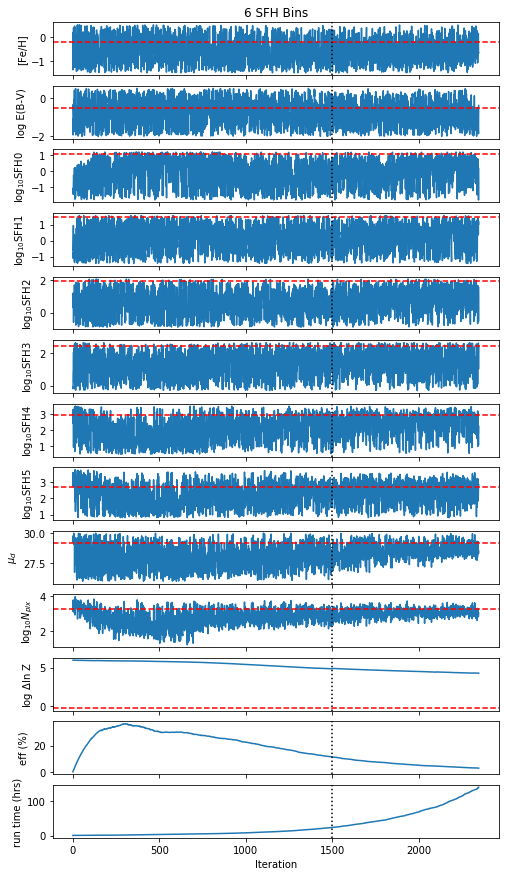

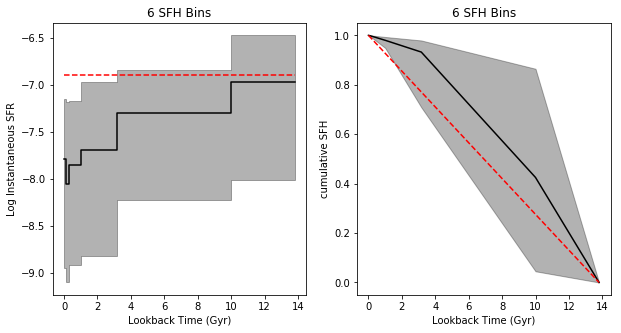

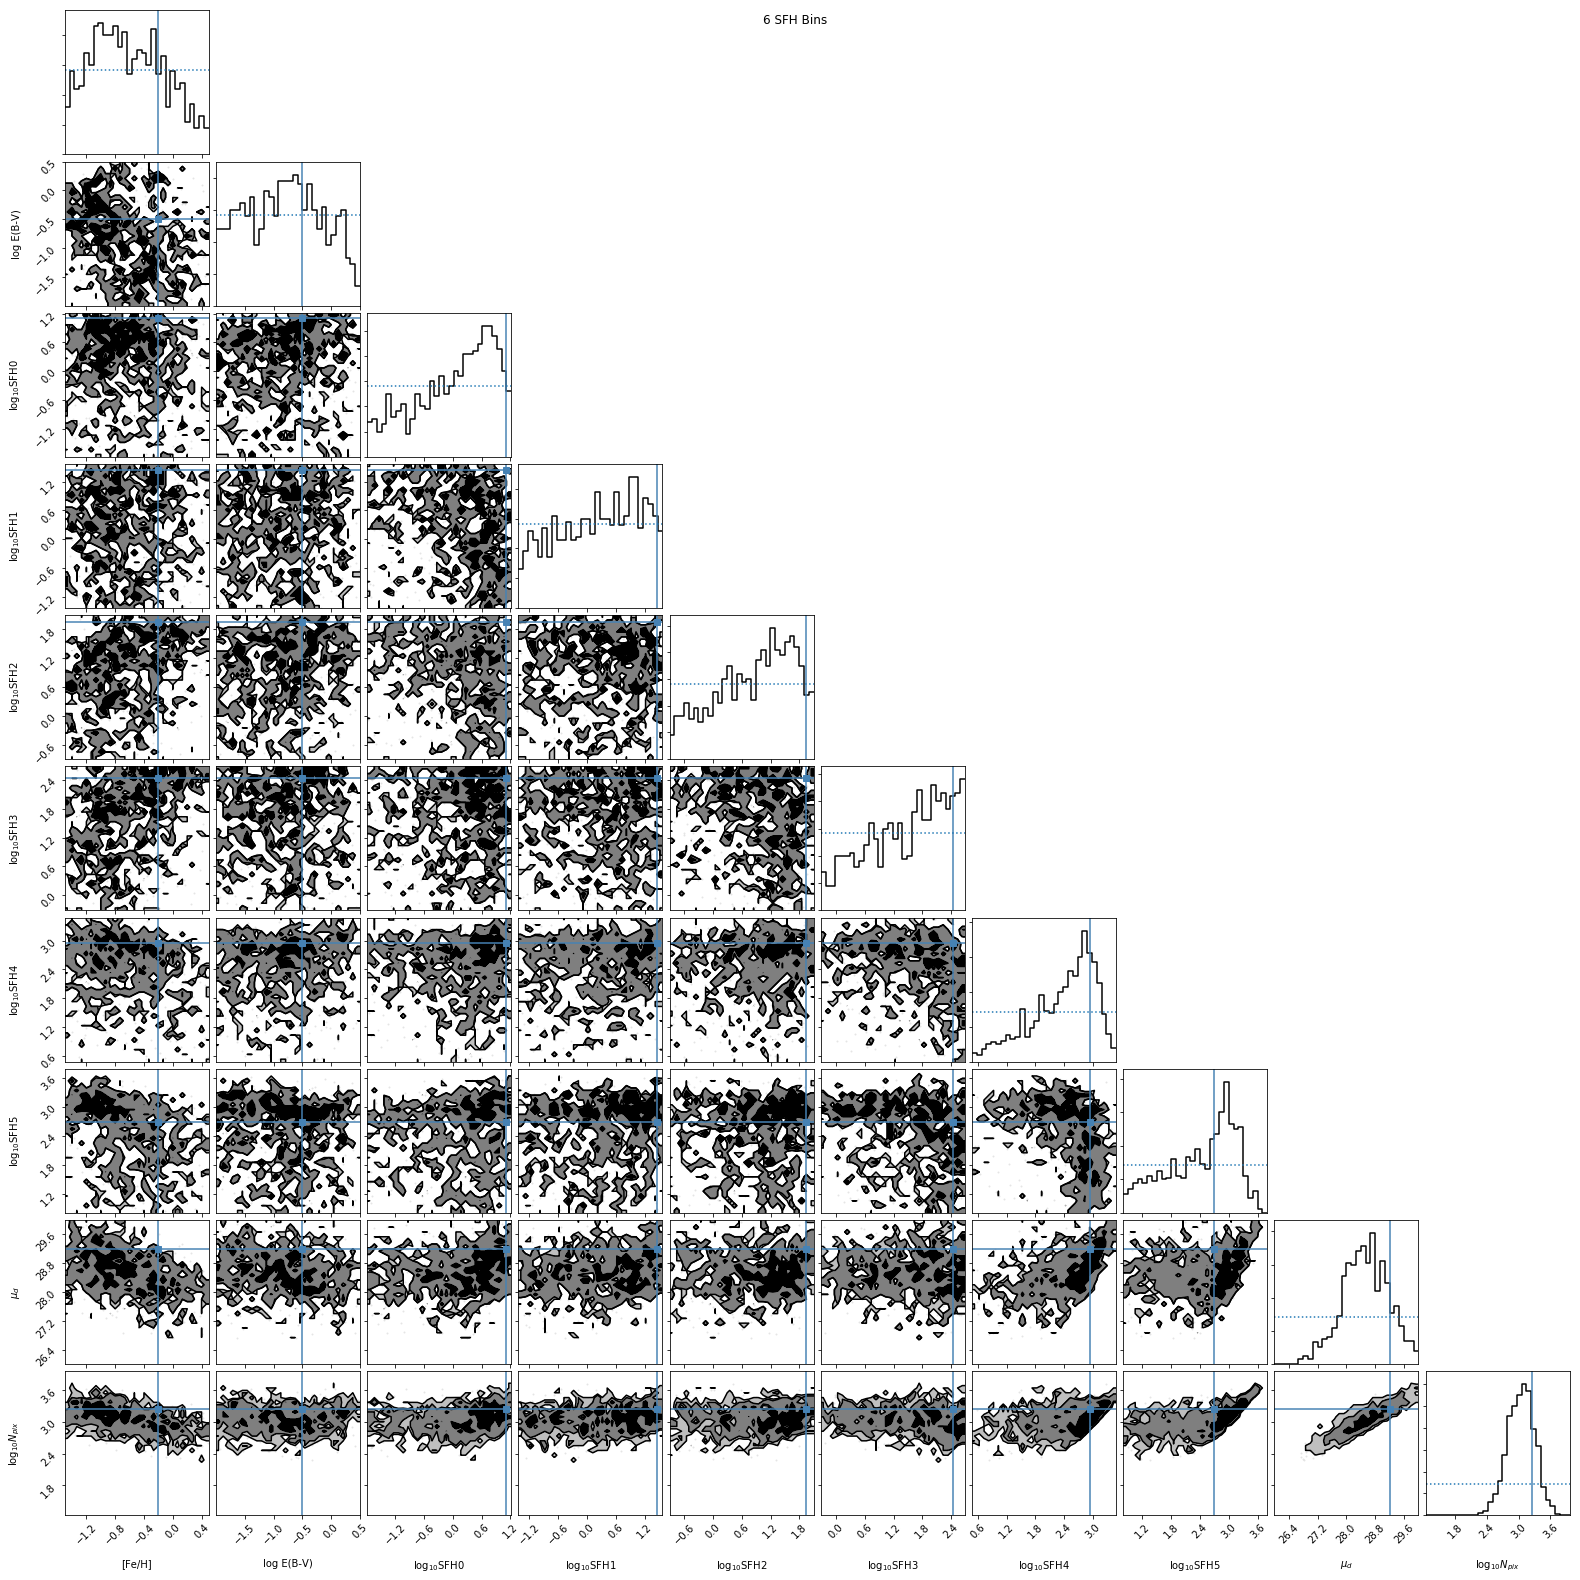

In [16]:
results['SFH6'].plot_everything(corner_kwargs={'weight':False}, burn=1500);

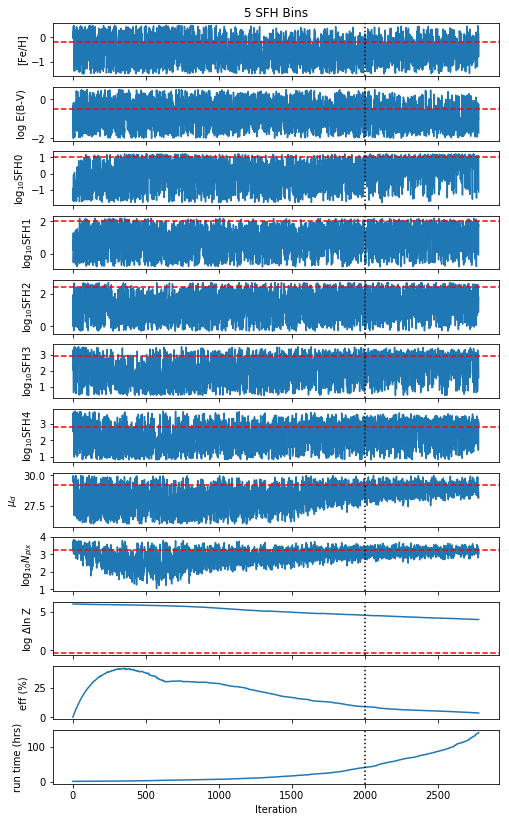

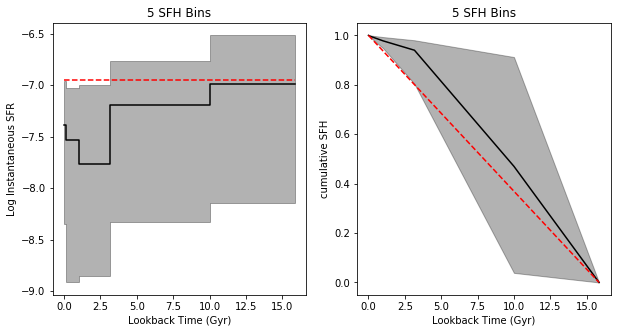

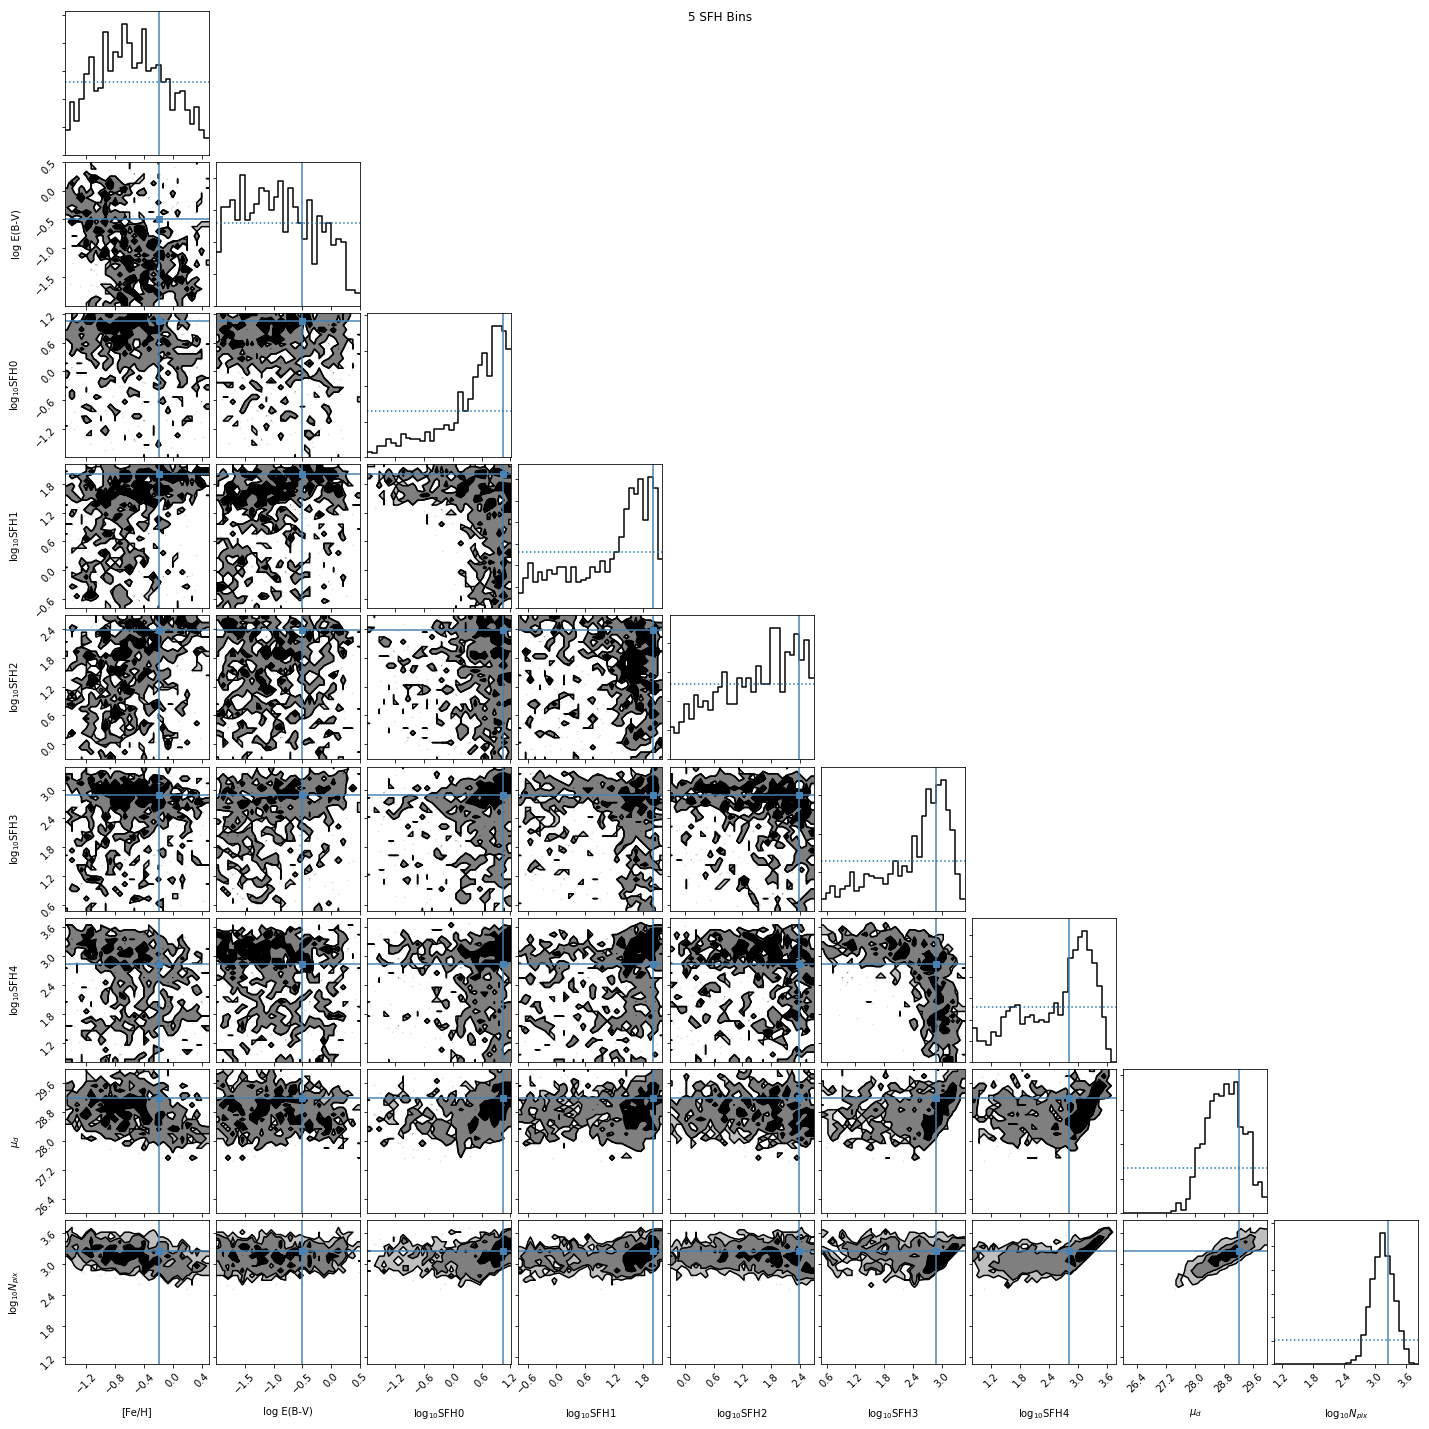

In [17]:
results['SFH5'].plot_everything(corner_kwargs={'weight':False}, burn=2000);

In [20]:
results['SFH6'].df.tail()

,nlive,niter,nc,eff,logl,logwt,logvol,logz,logzerr,h,...,logSFH0,logSFH1,logSFH2,logSFH3,logSFH4,logSFH5,dmod,logNpix,log_weights,weights
2344,2000.0,2345.0,786.0,3.1319,-156860.0,-156870.0,-7.8037,-156870.0,0.21739,14.201,...,0.63503,1.29640,-0.55590,1.6791,3.0814,1.8628,29.034,3.130721,-60.693147,4.378255e-27
2345,2000.0,2346.0,1.0,3.1332,-156860.0,-156870.0,-7.8070,-156870.0,0.21025,13.283,...,0.48938,1.21120,1.66310,1.4474,3.1183,1.8303,29.291,3.168545,-60.693147,4.378255e-27
2346,2000.0,2347.0,25.0,3.1335,-156840.0,-156850.0,-7.8103,-156850.0,0.21744,14.207,...,-0.34872,0.36578,1.00760,2.6543,1.7705,2.1789,28.363,2.828660,-40.693147,2.124177e-18
2347,2000.0,2348.0,51.0,3.1327,-156800.0,-156820.0,-7.8137,-156820.0,0.21746,14.211,...,-1.78170,1.19540,-0.54686,1.0364,2.2485,2.8676,28.288,2.973726,-0.693147,5.000000e-01
2348,2000.0,2349.0,410.0,3.1170,-156800.0,-156810.0,-7.8170,-156810.0,0.21510,13.903,...,0.18017,1.02700,1.55940,2.4837,1.0790,2.8540,28.509,3.033216,-0.693147,5.000000e-01


In [21]:
results['SFH5'].df.tail()

,nlive,niter,nc,eff,logl,logwt,logvol,logz,logzerr,h,...,logdust_med,logSFH0,logSFH1,logSFH2,logSFH3,logSFH4,dmod,logNpix,log_weights,weights
2774,2000.0,2775.0,10.0,3.7495,-147860.0,-147870.0,-9.2346,-147870.0,0.22808,15.632,...,-1.66110,0.95355,0.577040,1.80390,2.0618,3.2582,29.094,3.301875,-30.000091,9.356773e-14
2775,2000.0,2776.0,207.0,3.7404,-147850.0,-147870.0,-9.2379,-147870.0,0.22788,15.604,...,-0.89653,0.21666,1.974900,1.22550,2.4631,3.2122,29.113,3.308213,-20.000091,2.060966e-09
2776,2000.0,2777.0,149.0,3.7343,-147840.0,-147860.0,-9.2413,-147860.0,0.22812,15.637,...,-1.06530,1.11270,-0.064018,0.84974,3.0472,1.3872,28.854,3.064495,-10.000091,4.539581e-05
2777,2000.0,2778.0,383.0,3.7165,-147840.0,-147850.0,-9.2446,-147850.0,0.22018,14.569,...,-0.24481,0.67937,1.826000,1.52920,1.9822,3.1243,28.587,3.185527,-10.000091,4.539581e-05
2778,2000.0,2779.0,166.0,3.7096,-147830.0,-147850.0,-9.2479,-147850.0,0.22798,15.619,...,-1.73040,-1.13200,1.706200,1.77640,1.5842,2.9228,28.171,2.993967,-0.000091,9.999092e-01
